<a href="https://colab.research.google.com/github/chris-creditdesign/nih-grant-terminations/blob/main/training_grants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv("/content/2024-03-31-NIH Grant Terminations_ Auto-Generated - grant_data.csv")

# Drop any rows where the 'cancellation_source' column is not 'HHS reported' or 'Self reported'
df_confirmed = df[df['cancellation_source'].isin(['HHS reported', 'Self reported', 'Self and HHS reported'])]
total_grants_count = len(df_confirmed)
print(f"There are {total_grants_count} rows in the dataframe.")

There are 704 rows in the dataframe.


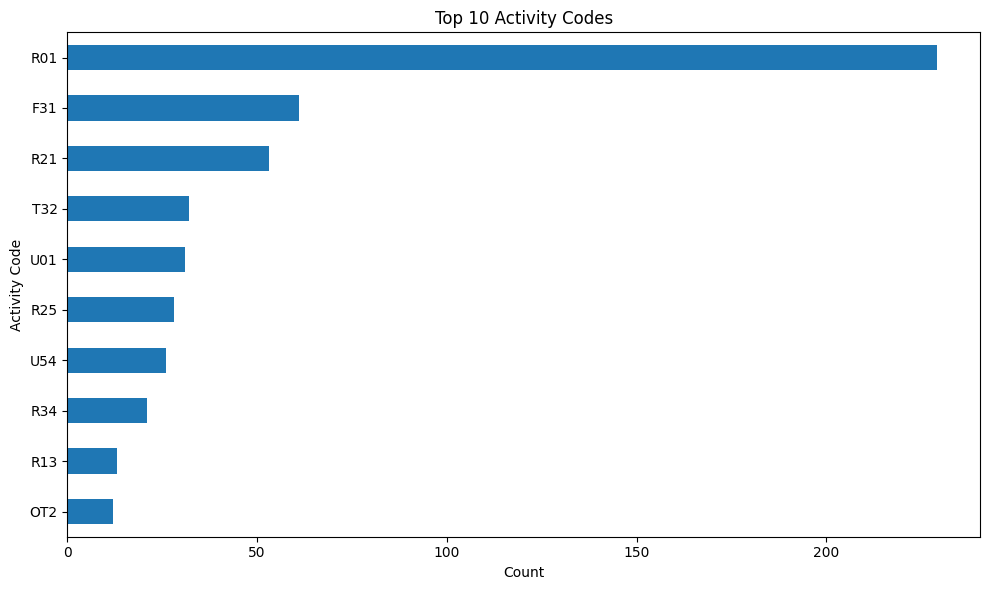

In [5]:
# Get the top 10 activity codes and their counts
top_10_activity_codes = df_confirmed['activity_code'].value_counts()[:10]

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
top_10_activity_codes.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Activity Code')
plt.title('Top 10 Activity Codes')
plt.gca().invert_yaxis() # Invert y-axis to display the most frequent activity code at the top
plt.tight_layout()
plt.show()


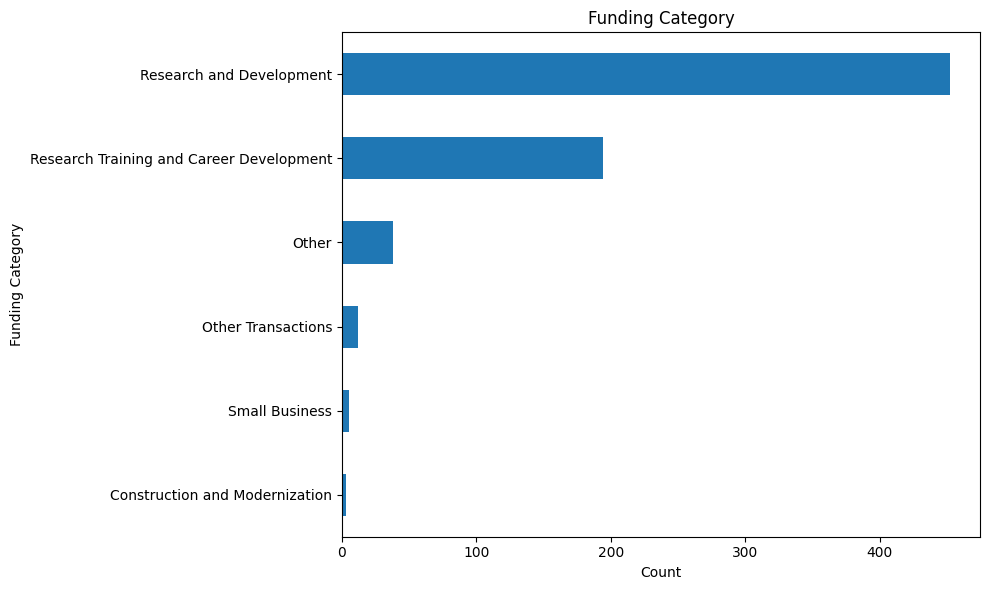

In [30]:
top_10_funding_category = df_confirmed['funding_category'].value_counts()

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
top_10_funding_category.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Funding Category')
plt.title('Funding Category')
plt.gca().invert_yaxis() # Invert y-axis to display the most frequent activity code at the top
plt.tight_layout()
plt.show()

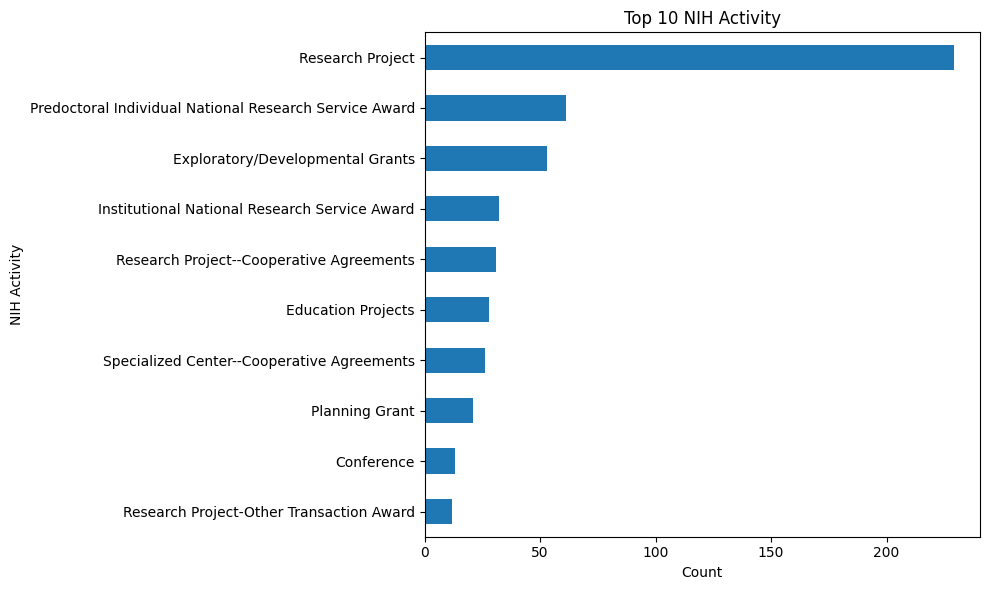

In [17]:
top_10_nih_activity = df_confirmed['nih_activity'].value_counts()[:10]

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
top_10_nih_activity.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('NIH Activity')
plt.title('Top 10 NIH Activity')
plt.gca().invert_yaxis() # Invert y-axis to display the most frequent activity code at the top
plt.tight_layout()
plt.show()

Definition of training grant:

funding_cat

- Research Training and Career Development

nih_activity

- Education Projects
- Dissertation Award
- Early Independence Award
- Predoctoral Individual National Research Service Award


In [31]:
# Filter the dataframe to contain just training grants.
nih_activity_filter = [
    'Education Projects',
    'Dissertation Award',
    'Early Independence Award',
    'Predoctoral Individual National Research Service Award'
]

nih_activity_mask = df_confirmed['nih_activity'].isin(nih_activity_filter)
traning_grant_mask = df_confirmed['funding_category'] == 'Research Training and Career Development'

df_training = df_confirmed[traning_grant_mask | nih_activity_mask]


In [27]:
percentage_training_grants = len(df_training) / total_grants_count * 100
print(f"{len(df_training)} training grants, wich is {percentage_training_grants:.2f}%")

194 training grants, wich is 27.56%
